<a href="https://colab.research.google.com/github/vvvipindsm/Interview/blob/master/playground.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [96]:

import pandas as pd
!pip install yfinance
!pip install numpy

import numpy as np

import matplotlib.pyplot as plt
import warnings
import yfinance

warnings.filterwarnings('ignore')


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [97]:
nifty_raw_data = yfinance.download (tickers = "^NSEI ^GSPC", start = "2008-01-08", 
                              end = "2022-06-27", interval = "1d", group_by = 'ticker', auto_adjust = True, treads = True)
stocks_raw_data = yfinance.download (tickers = "FEDERALBNK.NS", start = "2008-01-08", 
                              end = "2022-06-27", interval = "1d", group_by = 'ticker', auto_adjust = True, treads = True)



[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  1 of 1 completed


In [98]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [125]:
df_comp = nifty_raw_data.copy()
df_stock = stocks_raw_data.copy()
df_comp['nifty'] = df_comp['^NSEI'].Close[:]
df_comp['kpi'] = df_stock.Close[:]


df_comp['Qkpi'] = df_stock.Volume[:]
df_comp['spx'] = df_comp['^GSPC'].Close[:]
df_comp = df_comp.iloc[1:]
del df_comp['^GSPC']
del df_comp['^NSEI']

df_stock=df_stock.asfreq('b')
df_stock=df_stock.fillna(method='ffill')

df_comp=df_comp.asfreq('b')
df_comp=df_comp.fillna(method='ffill')
df_comp = df_comp[-len(df_stock):]

#spa
df_comp['ret_spx'] = df_comp.spx.pct_change(1).mul(100)
df_comp['norm_ret_spx'] = df_comp.ret_spx.div(df_comp.ret_spx[1])*100


df_comp['ret_nifty'] = df_comp.nifty.pct_change(1).mul(100)
df_comp['norm_ret_nifty'] = df_comp.ret_nifty.div(df_comp.ret_nifty[1])*100

# # kpi
df_comp['ret_kpi'] = df_comp.kpi.pct_change(1).mul(100)
df_comp['norm_ret_kpi'] = df_comp.ret_kpi.div(df_comp.ret_kpi[1])*100

# # kpi volumn
df_comp['ret_Qkpi'] = df_comp.Qkpi.pct_change(1).mul(100).fillna(1)
df_comp['norm_ret_Qkpi'] = pd.DataFrame(df_comp.ret_Qkpi.div(df_comp.ret_Qkpi[1])*100).fillna(1)

df_comp['ret_Qkpi'] = df_comp.ret_Qkpi.astype(np.float32)
df_comp.tail()
  

,nifty,kpi,Qkpi,spx,ret_spx,norm_ret_spx,ret_nifty,norm_ret_nifty,ret_kpi,norm_ret_kpi,ret_Qkpi,norm_ret_Qkpi
,,,,,,,,,,,,
Date,,,,,,,,,,,,
2022-06-20,15350.150391,84.800003,9567545.0,3674.840088,0.000000,0.000000,0.370421,-20.193713,-2.863688,-154.776104,-7.509524,-9.391920
2022-06-21,15638.799805,87.800003,8029209.0,3764.790039,2.447724,307.962205,1.880434,-102.512827,3.537736,191.206894,-16.078691,-20.109100
2022-06-22,15413.299805,86.800003,4463288.0,3759.889893,-0.130157,-16.375827,-1.441927,78.607374,-1.138952,-61.557876,-44.411858,-55.544480
2022-06-23,15556.650391,86.949997,7559023.0,3795.729980,0.953222,119.930287,0.930045,-50.701874,0.172804,9.339680,69.359962,86.746272
2022-06-24,15699.250000,89.349998,9452966.0,3911.739990,3.056329,384.534302,0.916647,-49.971503,2.760209,149.183264,25.055393,31.335973


In [126]:


#divide into train and validation set

size = int(len(df_comp)*0.8)
train, valid = df_comp.iloc[:size], df_comp.iloc[size:]
# train = df_comp
# train.head()

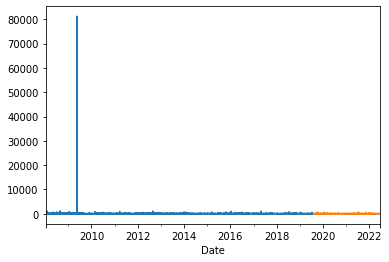

In [127]:
# plotting the data
train['ret_Qkpi'].plot()
valid['ret_Qkpi'].plot()
plt.show()

In [5]:
#building the model
!pip install pmdarima
from pmdarima.arima import auto_arima


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.4 MB 4.1 MB/s 
     |████████████████████████████████| 9.8 MB 35.2 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [128]:
# train[['ret_Qkpi']][1:].tail()df_test[['ret_spx', 'ret_dax', 'ret_nikkei']]
para_index =1
# old modal
# model_auto = auto_arima(df.ret_ftse[1:], exogenous = df[['ret_spx', 'ret_dax', 'ret_nikkei']][1:],
                      #  m = 5, max_p = 5, max_q = 5, max_P = 5, max_Q = 5)
model = auto_arima(train.ret_kpi[para_index:],exogenous = train[['ret_nifty','ret_spx','ret_Qkpi']][para_index:], 
                    m = 5, max_p = 5, max_q = 5, max_P = 5, max_Q = 5)
# model.fit(train.ret_ftse[para_index:])



ValueError: ignored

In [119]:
start_date = "2021-01-23"
# ^CNXENERGY
end_date = "2022-05-23"
df_auto_pred = pd.DataFrame(model.predict(n_periods = len(valid[start_date:end_date]),
                            exogenous = valid[['ret_nifty','ret_spx']][start_date:end_date]),
                            index = valid[start_date:end_date].index)

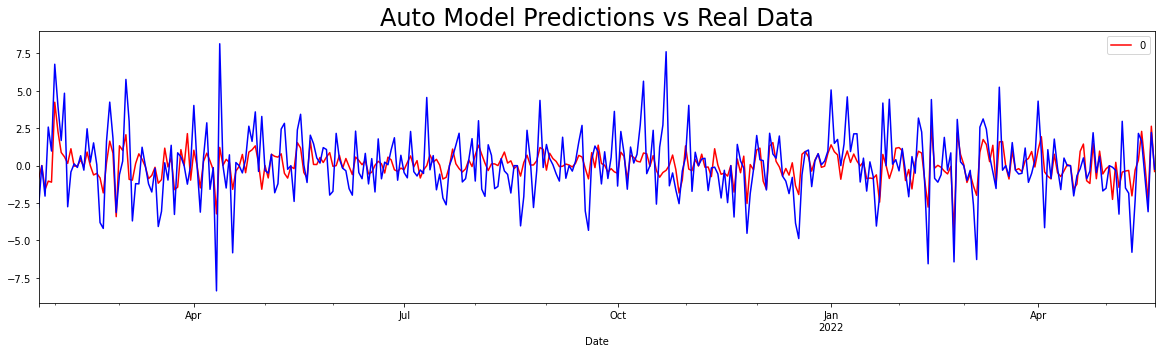

In [120]:


df_auto_pred.plot(figsize = (20,5), color = "red")
valid.ret_kpi[start_date:end_date].plot(color = "blue")
plt.title("Auto Model Predictions vs Real Data", size = 24)
plt.show()